Task 1. Solve classification task (10 points) 

First Second name PLEASE


**Dinmukhamed Tursynbay**

In [47]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
from torch.utils.data import DataLoader,Dataset
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

1. Data preparation 

In [48]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [49]:
ds = tfds.load('beans', split='train', shuffle_files=True)

In [6]:
ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [50]:
df = tfds.as_dataframe(ds)

In [8]:
df.head()

,image,label
0,"[[[149, 132, 106], [141, 124, 98], [134, 118, ...",1
1,"[[[129, 118, 88], [95, 81, 54], [84, 66, 46], ...",1
2,"[[[64, 88, 14], [65, 89, 15], [66, 88, 15], [6...",0
3,"[[[93, 109, 83], [96, 112, 86], [97, 115, 91],...",1
4,"[[[78, 103, 46], [86, 102, 53], [103, 103, 67]...",2


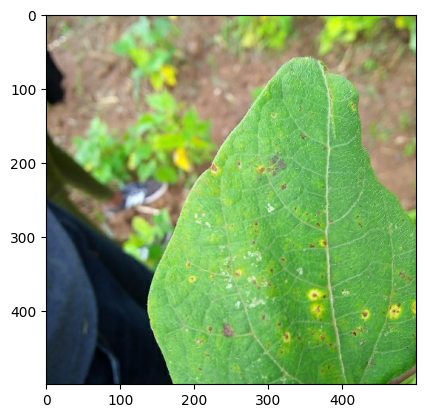

In [9]:
plt.imshow(df['image'][0], cmap='gray')

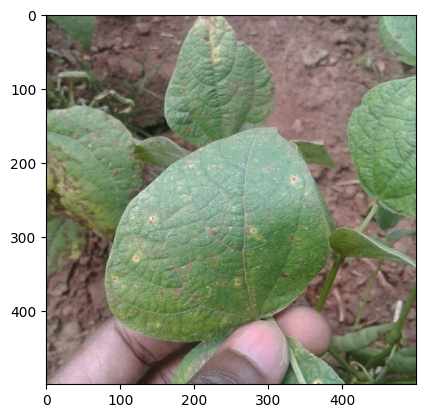

In [10]:
plt.imshow(df['image'][3], cmap='gray')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(df['image']), np.array(df['label']), test_size=0.2, random_state=10)

In [6]:
#your code here
#you can use code from lab with CNN for classification, but you will need to add extra layers  
df['label'].unique()

array([1, 0, 2])

In [14]:
len(y_train)

827

In [15]:
len(y_test)

207

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(500, 500, 3)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(3)
  ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0

In [9]:
def scale(x):
  x = tf.cast(x, tf.float32)
  x /= 255
  return x

X_train = list(map(scale, X_train))
X_test = list(map(scale, X_test))

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))


BATCH_SIZE = 8
SHUFFLE_BUFFER_SIZE = 14

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [51]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model.fit(train_dataset, epochs=8)

Epoch 1/2
52/52 [==============================] - 214s 4s/step - loss: 0.2988 - accuracy: 0.8888
Epoch 2/2
52/52 [==============================] - 210s 4s/step - loss: 0.1681 - accuracy: 0.9480


In [52]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(1)
pred = model.predict(test_dataset)

207/207 [==============================] - 17s 80ms/step


In [53]:
y_pred = []
for x in pred:
  y_pred.append(x.argmax())

Baseline accuracy more than 70 for all of classes AND more than 35 for each 

In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[52 18  7]
 [13 51  6]
 [ 4  9 47]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        77
           1       0.65      0.73      0.69        70
           2       0.78      0.78      0.78        60

    accuracy                           0.72       207
   macro avg       0.73      0.73      0.73       207
weighted avg       0.73      0.72      0.73       207



Write a function for classification of one image:
<br> Input: 1 image from dataset
<br> Output: predicted class, target class and comparison 

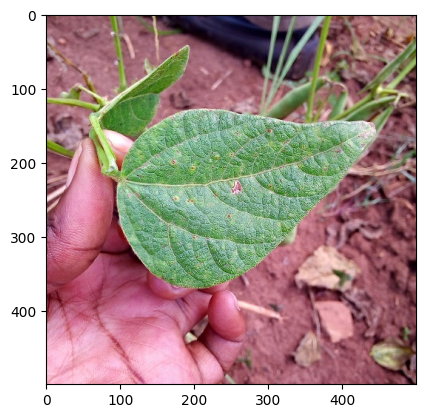

In [41]:
#your code here
img = df['image'][0]
label = df['label'][0]
plt.imshow(img, cmap='gray')

In [42]:
ww = []
ww.append(img)

In [43]:
ww = list(map(scale, ww))
ww =  tf.data.Dataset.from_tensor_slices(ww)

In [44]:
res = model.predict(ww.batch(1))

1/1 [==============================] - 0s 151ms/step


In [45]:
print(f"Predicted: {res.argmax()}")
print(f"Actual Label: {label}")

Predicted: 1
Actual Label: 1


Theoretical part (5 points) 
<br> 1) Describe the reason why Usual Classification algorithms are not applicable for solving Face Recognition problem
<br> 2) Provide example of metrics for solving classification, segmentation and object detection problem 

1) Face Recognition is technique used to detect faces of people whose images saved in the dataset. Usual Classifcation algorithms use patterns to recognise common features and classify. Face recognition requieres much more precise and complicated calculation for classidifaction. Face recognition algorithms often use specialized techniques such as DL which can analyze and compare large amounts of data to identify unique patterns and features. These algorithms are designed to learn and adapt over time, making them more effective for recognizing faces in a variety of situations.

2) **Classification metrics** classical report usually consists of Accuracy, Recall, Precision and F1 Score.

Accuracy = (TN+TP)/(TN+TP+FN+FP).
Recall = TP/(FN+TP)
Precision = TP/(FP+TP)
F1 score = 2 * Recall * Precision / (Recall + Precision)

**Segmentation metrics** which are usually used IOU and DICE.


iou = TP / (TP+FP+FN)

dice = 2 * iou / (iou + 1)

**Object Detection**  usualy used iou and mean average precision(MaP).

iou = TP / (TP+FP+FN)

MaP = mean(precision) over classes used for detection.